In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
events_ttbar = uproot.open("../data/user.khanov.mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.r12573_mc_trk_Akt4EMTo/user.khanov.37100851.Akt4EMTo._000001.root:bTag_AntiKt4EMTopoJets")
events_ZZ4nu = uproot.open("../data/user.khanov.mc15.mc15_14TeV.600026.PhH7EG_NNPDF3_AZNLO_VBFH125_ZZ4nu_MET75.r13618_mc_trk_Akt4EMTo/user.khanov.37100685.Akt4EMTo._000001.root:bTag_AntiKt4EMTopoJets")

In [3]:
#events.keys()
#events.values()

In [4]:
jet_pt = events_ttbar["jet_pt_orig"].array(library='ak')
jet_eta = events_ttbar["jet_eta"].array(library='ak')
jet_phi = events_ttbar["jet_phi"].array(library='ak')
trk_pt = events_ttbar["trk_pt"].array(library='ak')
trk_eta = events_ttbar["trk_eta"].array(library='ak')
trk_phi = events_ttbar["trk_phi"].array(library='ak')

trk_mc_index = events_ttbar["trk_mc_index"].array(library='ak')
mc_puevent = events_ttbar["mc_puevent"].array(library='ak')
mc_putype = events_ttbar["mc_putype"].array(library='ak')

jet_trkAssoc_index = events_ttbar["jet_trackAssoc_index"].array(library='ak')

In [5]:
events = len(jet_pt)
#events = 1000

delta_R_h = []
pt_ratio_h = []
pt_ratio_NO_PU_h = []
num_trks_h = []
jet_pt_h = []
trk_pt_h = []

pt_ratio_low_h = []
pt_ratio_mid_h = []
pt_ratio_high_h = []
num_trks_low_h = []
num_trks_mid_h = []
num_trks_high_h = []
#num_vrtx_per_jet = []
pt_ratio_low_NO_PU_h = []
pt_ratio_mid_NO_PU_h = []
pt_ratio_high_NO_PU_h = []


for i in range(events):
    for j in range(len(jet_pt[i])):
        sum_pt = 0
        sum_pt_HS_ONLY = 0
        num_vrtx = 0
        
        jpt = jet_pt[i][j]/1000
        jet_pt_h.append(jpt)
        jeta = jet_eta[i][j]
        jphi = jet_phi[i][j]
        
        num_trk = len(jet_trkAssoc_index[i][j])
        #if num_trk == 0:
        #     continue
        num_trks_h.append(num_trk)
        for k in range(num_trk):
            jtr = jet_trkAssoc_index[i][j][k]
            tpt = trk_pt[i][jtr]/1000
            trk_pt_h.append(tpt)
            teta = trk_eta[i][jtr]
            tphi = trk_phi[i][jtr]

            imc = trk_mc_index[i][jtr]
            if imc<0:
                jet_label=-999
                trk_label=-999
            else:
                # Jet vertex. -1=HS ; else=PU
                jet_label = mc_puevent[i][imc] 
                # Trk label. 1=PU ; 0=Not PU
                trk_label = mc_putype[i][imc]
            
            sum_pt+=tpt
            if trk_label==0:
                sum_pt_HS_ONLY+=tpt
            
            dR = np.sqrt((jeta-teta)**2+(jphi-tphi)**2)
            if dR>5:
                delta_R_h.append(abs(dR-6.28))
            else:
                delta_R_h.append(dR)
        pt_ratio_h.append(sum_pt/jpt)
        pt_ratio_NO_PU_h.append(sum_pt_HS_ONLY/jpt)
        if jpt<40:
            num_trks_low_h.append(num_trk)
            pt_ratio_low_h.append(sum_pt/jpt)
            pt_ratio_low_NO_PU_h.append(sum_pt_HS_ONLY/jpt)
        elif jpt<70:
            num_trks_mid_h.append(num_trk)
            pt_ratio_mid_h.append(sum_pt/jpt)
            pt_ratio_mid_NO_PU_h.append(sum_pt_HS_ONLY/jpt)
        elif jpt>=70:
            num_trks_high_h.append(num_trk)
            pt_ratio_high_h.append(sum_pt/jpt)
            pt_ratio_high_NO_PU_h.append(sum_pt_HS_ONLY/jpt)

Num Events:  5000
Num Jets:  160904
Num Tracks:  3050399


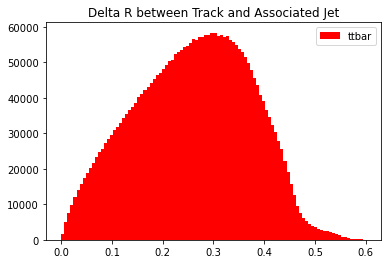

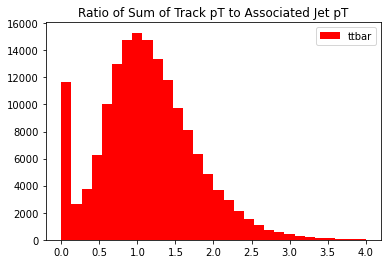

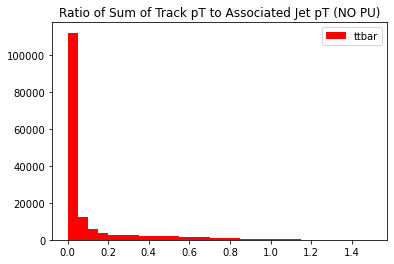

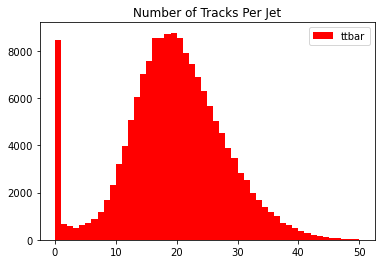

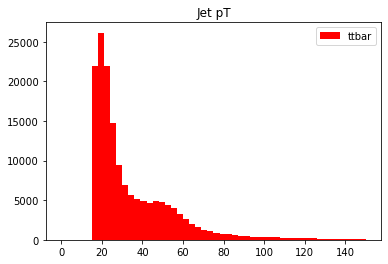

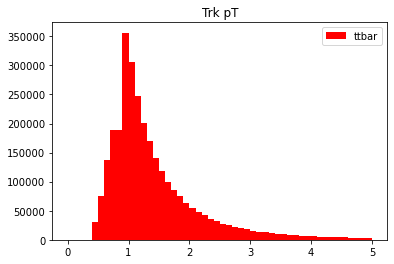

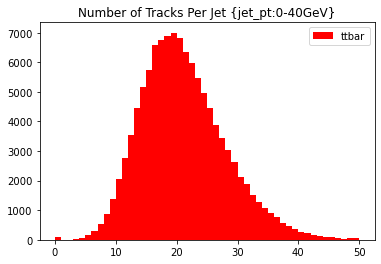

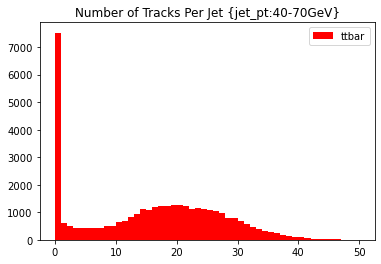

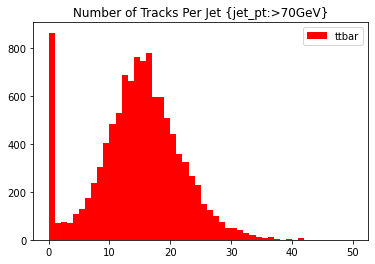

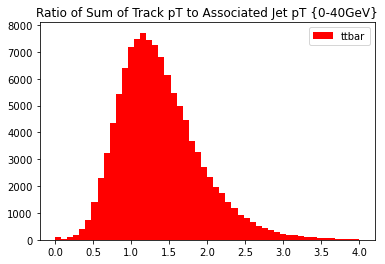

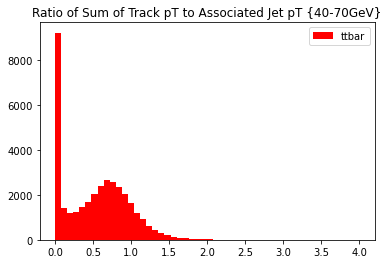

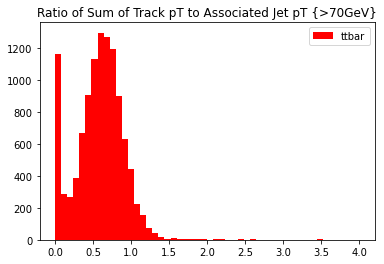

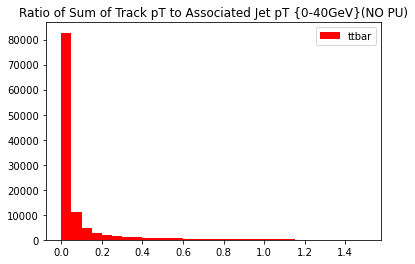

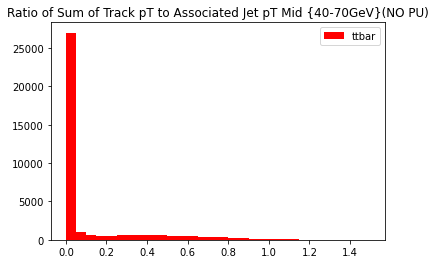

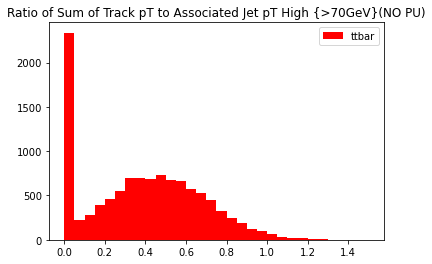

In [6]:
print("Num Events: ", len(jet_pt))
print("Num Jets: ", len(jet_pt_h))
print("Num Tracks: ", len(delta_R_h))
plt.hist(delta_R_h, bins=100,range=(0,0.6),color='red')
plt.title("Delta R between Track and Associated Jet")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_h, bins=30,range=(0,4),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_NO_PU_h, bins=30,range=(0,1.5),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT (NO PU)")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks_h, bins=50,color='red',range=(0,50))
plt.title("Number of Tracks Per Jet")
plt.legend(["ttbar"])
plt.show()
plt.hist(jet_pt_h, bins=50,range=(0,150),color='red')
plt.title("Jet pT")
plt.legend(["ttbar"])
plt.show()
plt.hist(trk_pt_h, bins=50,color='red',range=(0,5))
plt.title("Trk pT")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks_low_h, bins=50,range=(0,50),color='red')
plt.title("Number of Tracks Per Jet {jet_pt:0-40GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks_mid_h, bins=50,range=(0,50),color='red')
plt.title("Number of Tracks Per Jet {jet_pt:40-70GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks_high_h, bins=50,range=(0,50),color='red')
plt.title("Number of Tracks Per Jet {jet_pt:>70GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_low_h, bins=50,range=(0,4),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {0-40GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_mid_h, bins=50,range=(0,4),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {40-70GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_high_h, bins=50,range=(0,4),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {>70GeV}")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_low_NO_PU_h, bins=30,range=(0,1.5),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {0-40GeV}(NO PU)")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_mid_NO_PU_h, bins=30,range=(0,1.5),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT Mid {40-70GeV}(NO PU)")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio_high_NO_PU_h, bins=30,range=(0,1.5),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT High {>70GeV}(NO PU)")
plt.legend(["ttbar"])
plt.show()

In [7]:
jet_pt = events_ZZ4nu["jet_pt_orig"].array(library='ak')
jet_eta = events_ZZ4nu["jet_eta"].array(library='ak')
jet_phi = events_ZZ4nu["jet_phi"].array(library='ak')
trk_pt = events_ZZ4nu["trk_pt"].array(library='ak')
trk_eta = events_ZZ4nu["trk_eta"].array(library='ak')
trk_phi = events_ZZ4nu["trk_phi"].array(library='ak')

trk_mc_index = events_ZZ4nu["trk_mc_index"].array(library='ak')
mc_puevent = events_ZZ4nu["mc_puevent"].array(library='ak')
mc_putype = events_ZZ4nu["mc_putype"].array(library='ak')

jet_trkAssoc_index = events_ZZ4nu["jet_trackAssoc_index"].array(library='ak')

In [8]:
events = len(jet_pt)
#events = 100

delta_R_h = []
pt_ratio_h = []
pt_ratio_NO_PU_h = []
num_trks_h = []
jet_pt_h = []
trk_pt_h = []

pt_ratio_low_h = []
pt_ratio_mid_h = []
pt_ratio_high_h = []
num_trks_low_h = []
num_trks_mid_h = []
num_trks_high_h = []
#num_vrtx_per_jet = []
pt_ratio_low_NO_PU_h = []
pt_ratio_mid_NO_PU_h = []
pt_ratio_high_NO_PU_h = []


for i in range(events):
    for j in range(len(jet_pt[i])):
        sum_pt = 0
        sum_pt_HS_ONLY = 0
        num_vrtx = 0
        
        jpt = jet_pt[i][j]/1000
        jet_pt_h.append(jpt)
        jeta = jet_eta[i][j]
        jphi = jet_phi[i][j]
        
        num_trk = len(jet_trkAssoc_index[i][j])
        #if num_trk == 0:
        #     continue
        num_trks_h.append(num_trk)
        for k in range(num_trk):
            jtr = jet_trkAssoc_index[i][j][k]
            tpt = trk_pt[i][jtr]/1000
            trk_pt_h.append(tpt)
            teta = trk_eta[i][jtr]
            tphi = trk_phi[i][jtr]

            imc = trk_mc_index[i][jtr]
            if imc<0:
                jet_label=-999
                trk_label=-999
            else:
                # Jet vertex. -1=HS ; else=PU
                jet_label = mc_puevent[i][imc] 
                # Trk label. 1=PU ; 0=Not PU
                trk_label = mc_putype[i][imc]
            
            sum_pt+=tpt
            if trk_label==0:
                sum_pt_HS_ONLY+=tpt
            
            dR = np.sqrt((jeta-teta)**2+(jphi-tphi)**2)
            if dR>5:
                delta_R_h.append(abs(dR-6.28))
            else:
                delta_R_h.append(dR)
        pt_ratio_h.append(sum_pt/jpt)
        pt_ratio_NO_PU_h.append(sum_pt_HS_ONLY/jpt)
        if jpt<40:
            num_trks_low_h.append(num_trk)
            pt_ratio_low_h.append(sum_pt/jpt)
            pt_ratio_low_NO_PU_h.append(sum_pt_HS_ONLY/jpt)
        elif jpt<70:
            num_trks_mid_h.append(num_trk)
            pt_ratio_mid_h.append(sum_pt/jpt)
            pt_ratio_mid_NO_PU_h.append(sum_pt_HS_ONLY/jpt)
        elif jpt>=70:
            num_trks_high_h.append(num_trk)
            pt_ratio_high_h.append(sum_pt/jpt)
            pt_ratio_high_NO_PU_h.append(sum_pt_HS_ONLY/jpt)

Num Events:  2000
Num Jets:  62790
Num Tracks:  1188364


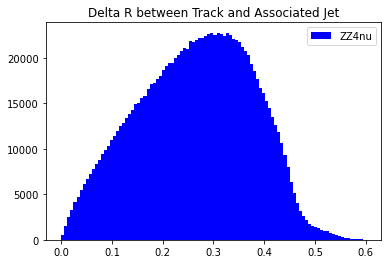

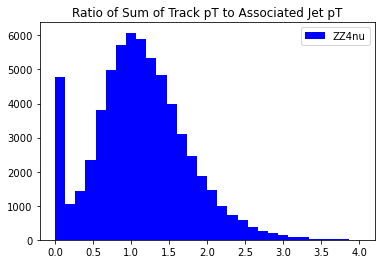

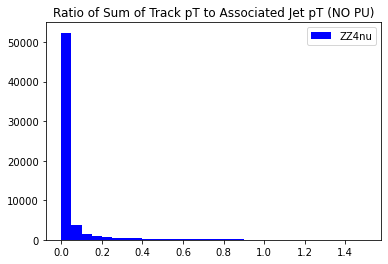

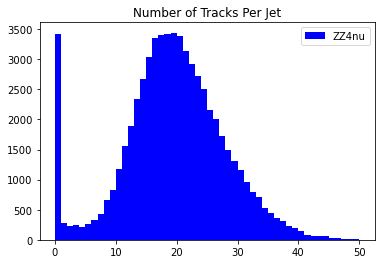

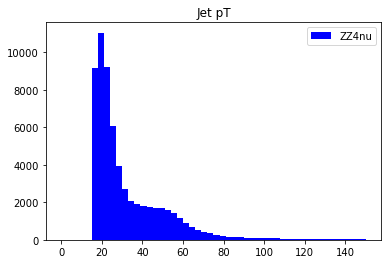

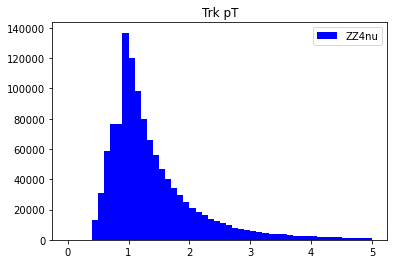

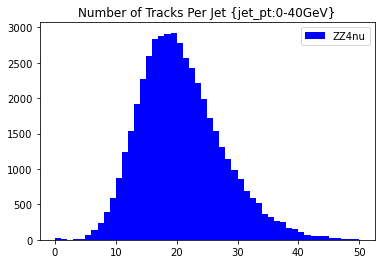

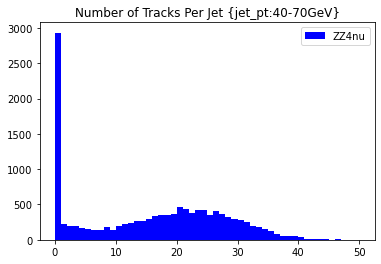

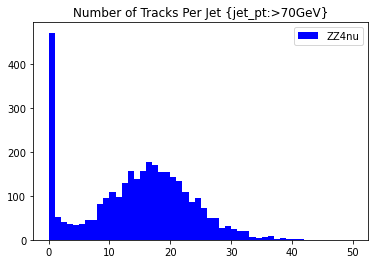

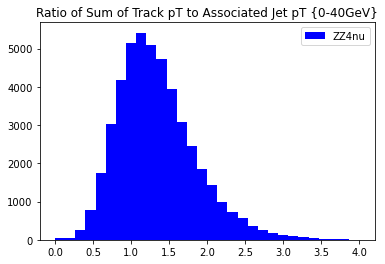

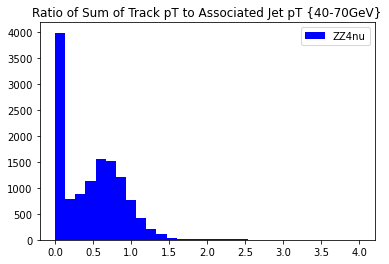

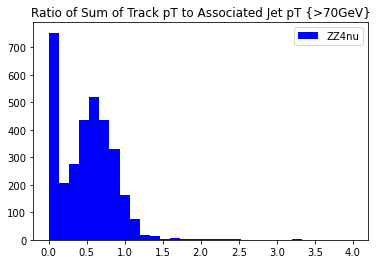

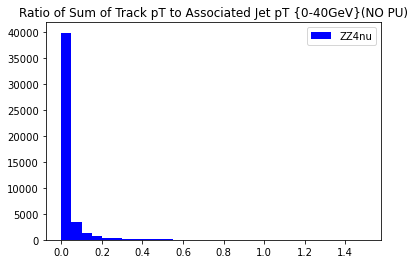

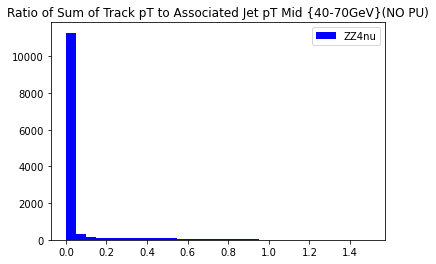

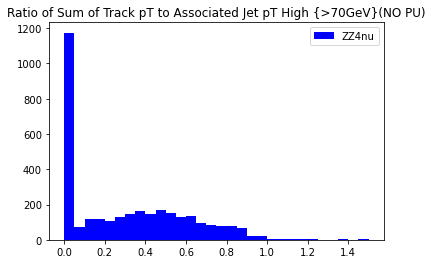

In [9]:
print("Num Events: ", len(jet_pt))
print("Num Jets: ", len(jet_pt_h))
print("Num Tracks: ", len(delta_R_h))
plt.hist(delta_R_h, bins=100,range=(0,0.6),color='blue')
plt.title("Delta R between Track and Associated Jet")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio_h, bins=30,range=(0,4),color='blue')
plt.title("Ratio of Sum of Track pT to Associated Jet pT")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio_NO_PU_h, bins=30,range=(0,1.5),color='blue')
plt.title("Ratio of Sum of Track pT to Associated Jet pT (NO PU)")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(num_trks_h, bins=50,range=(0,50),color='blue')
plt.title("Number of Tracks Per Jet")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(jet_pt_h, bins=50,range=(0,150),color='blue')
plt.title("Jet pT")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(trk_pt_h, bins=50,color='blue',range=(0,5))
plt.title("Trk pT")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(num_trks_low_h, bins=50,range=(0,50),color='blue')
plt.title("Number of Tracks Per Jet {jet_pt:0-40GeV}")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(num_trks_mid_h, bins=50,range=(0,50),color='blue')
plt.title("Number of Tracks Per Jet {jet_pt:40-70GeV}")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(num_trks_high_h, bins=50,range=(0,50),color='blue')
plt.title("Number of Tracks Per Jet {jet_pt:>70GeV}")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio_low_h, bins=30,range=(0,4),color='blue')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {0-40GeV}")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio_mid_h, bins=30,range=(0,4),color='blue')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {40-70GeV}")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio_high_h, bins=30,range=(0,4),color='blue')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {>70GeV}")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio_low_NO_PU_h, bins=30,range=(0,1.5),color='blue')
plt.title("Ratio of Sum of Track pT to Associated Jet pT {0-40GeV}(NO PU)")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio_mid_NO_PU_h, bins=30,range=(0,1.5),color='blue')
plt.title("Ratio of Sum of Track pT to Associated Jet pT Mid {40-70GeV}(NO PU)")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio_high_NO_PU_h, bins=30,range=(0,1.5),color='blue')
plt.title("Ratio of Sum of Track pT to Associated Jet pT High {>70GeV}(NO PU)")
plt.legend(["ZZ4nu"])
plt.show()
